In [1]:
import pandas as pd
url = 'https://barttorvik.com/trank.php?year={yr}&sort=&top=0&conlimit=All&venue=All&type=R#'


In [ ]:
dfs = []
for x in range(2018,2026):
    print(x)
    print(url.format(yr=x))
    df = pd.read_html(url.format(yr=x), header= 1)[0]
    df['Year'] = x
    dfs.append(df)
finaldf = pd.concat(dfs,ignore_index= True)

2017
https://barttorvik.com/trank.php?year=2017&sort=&top=0&conlimit=All&venue=All&type=R#
2018
https://barttorvik.com/trank.php?year=2018&sort=&top=0&conlimit=All&venue=All&type=R#
2019
https://barttorvik.com/trank.php?year=2019&sort=&top=0&conlimit=All&venue=All&type=R#
2020
https://barttorvik.com/trank.php?year=2020&sort=&top=0&conlimit=All&venue=All&type=R#
2021
https://barttorvik.com/trank.php?year=2021&sort=&top=0&conlimit=All&venue=All&type=R#
2022
https://barttorvik.com/trank.php?year=2022&sort=&top=0&conlimit=All&venue=All&type=R#
2023
https://barttorvik.com/trank.php?year=2023&sort=&top=0&conlimit=All&venue=All&type=R#
2024
https://barttorvik.com/trank.php?year=2024&sort=&top=0&conlimit=All&venue=All&type=R#


In [184]:
#Clean up the dataset
finaldf[['Rec', 'Conf Record']] = finaldf['Rec'].str.split(' ', expand=True)
finaldf[['AdjOE', 'AdjOE Rank']] = finaldf['AdjOE'].str.split(' ', expand=True)
finaldf[['AdjDE', 'AdjDE Rank']] = finaldf['AdjDE'].str.split(' ', expand=True)
finaldf[['Barthag', 'Barthag Rank']] = finaldf['Barthag'].str.split(' ', expand=True)
finaldf[['EFG%', 'EFG% Rank']] = finaldf['EFG%'].str.split(' ', expand=True)
finaldf[['EFGD%', 'EFGD% Rank']] = finaldf['EFGD%'].str.split(' ', expand=True)
finaldf[['TOR', 'TOR Rank']] = finaldf['TOR'].str.split(' ', expand=True)
finaldf[['ORB', 'ORB Rank']] = finaldf['ORB'].str.split(' ', expand=True)
finaldf[['DRB', 'DRB Rank']] = finaldf['DRB'].str.split(' ', expand=True)
finaldf[['FTR', 'FTR Rank']] = finaldf['FTR'].str.split(' ', expand=True)
finaldf[['FTRD', 'FTRD Rank']] = finaldf['FTRD'].str.split(' ', expand=True)
finaldf[['2P%', '2P% Rank']] = finaldf['2P%'].str.split(' ', expand=True)
finaldf[['2P%D', '2P%D Rank']] = finaldf['2P%D'].str.split(' ', expand=True)
finaldf[['3P%', '3P% Rank']] = finaldf['3P%'].str.split(' ', expand=True)
finaldf[['3P%D', '3P%D Rank']] = finaldf['3P%D'].str.split(' ', expand=True)
finaldf = finaldf[finaldf['Team']!= "Team"]

In [185]:
finaldf = finaldf.apply(pd.to_numeric, errors='ignore')
print(finaldf.head())

   Rk                            Team Conf   G    Rec  AdjOE  AdjDE  Barthag  \
0   1         Gonzaga  1 seed, Finals  WCC  33   32–1  119.8   88.0   0.9720   
1   2          Villanova  1 seed, R32   BE  34   31–3  122.2   92.2   0.9622   
2   3           Virginia  5 seed, R32  ACC  32  22–10  114.1   86.7   0.9591   
3   4   Kentucky  2 seed, Elite Eight  SEC  34   29–5  119.2   91.5   0.9545   
4   5  North Carolina  1 seed, CHAMPS  ACC  33   26–7  121.0   93.1   0.9531   

   EFG%  EFGD%  ...  EFGD% Rank TOR Rank  ORB Rank  DRB Rank  FTR Rank  \
0  58.0   41.6  ...           1       23       148        31        92   
1  57.9   48.1  ...          70       71       159       102       173   
2  52.9   45.7  ...          20       15       203         8       349   
3  53.2   47.4  ...          46       29        39        83        31   
4  52.3   48.5  ...          84       43         1        27       246   

   FTRD Rank  2P% Rank  2P%D Rank  3P% Rank  3P%D Rank  
0         12     

C:\Users\Manas\AppData\Local\Temp\ipykernel_15228\607940783.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  finaldf = finaldf.apply(pd.to_numeric, errors='ignore')


In [186]:
def extract_tournament_result(input_string):
    if "seed" in input_string:
        parts = input_string.split("seed,")
        if len(parts) > 1:
            tounament_result = parts[1].strip()
            return tounament_result
    return None

In [187]:
import re
def extract_seed(input_string):
    match = re.search(r'(...)(?=seed)',input_string)
    if match:
        return match.group(1)
    return None

In [188]:
def extract_team_name(input_string):
    # Use regular expression to find three characters before "seed"
    match = re.search(r'^(.*?)...(?=seed)', input_string)
    if match:
        # Extract the matched substring
        return match.group(1)
    return input_string

In [189]:
clean_df = finaldf.copy()
clean_df['Tournament Result'] = clean_df['Team'].apply(extract_tournament_result)
clean_df['Tournament Seed'] = clean_df['Team'].apply(extract_seed)
clean_df['Team'] = clean_df['Team'].apply(extract_team_name)
clean_df = clean_df.apply(pd.to_numeric, errors='ignore')

C:\Users\Manas\AppData\Local\Temp\ipykernel_15228\2186746013.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  clean_df = clean_df.apply(pd.to_numeric, errors='ignore')


In [190]:
print(clean_df.head())

   Rk             Team Conf   G    Rec  AdjOE  AdjDE  Barthag  EFG%  EFGD%  \
0   1         Gonzaga   WCC  33   32–1  119.8   88.0   0.9720  58.0   41.6   
1   2       Villanova    BE  34   31–3  122.2   92.2   0.9622  57.9   48.1   
2   3        Virginia   ACC  32  22–10  114.1   86.7   0.9591  52.9   45.7   
3   4        Kentucky   SEC  34   29–5  119.2   91.5   0.9545  53.2   47.4   
4   5  North Carolina   ACC  33   26–7  121.0   93.1   0.9531  52.3   48.5   

   ...  ORB Rank DRB Rank  FTR Rank  FTRD Rank  2P% Rank  2P%D Rank  3P% Rank  \
0  ...       148       31        92         12         4          2        43   
1  ...       159      102       173          1         2        155        78   
2  ...       203        8       349        151       138         28        19   
3  ...        39       83        31        164        35        122       156   
4  ...         1       27       246         79        94         71        88   

   3P%D Rank  Tournament Result  Tournament 

In [191]:
#Adding some labeling columns for analysis later
def get_tournament_games_won (input_string):
    
    if(input_string== "R68" or input_string == "R64"):
            return 0
    else:
          if(input_string == "R32"):
                return 1
          else:
                if(input_string == "Sweet Sixteen"):
                      return 2
                else:
                      if(input_string == "Elite Eight"):
                            return 3
                      else:
                            if(input_string == "Final Four"):
                                  return 4
                            else:
                                  if(input_string == "Finals"):
                                        return 5
                                  else:
                                        if(input_string =="CHAMPS"):
                                              return 6
                                        else:
                                            return 0

In [192]:
clean_df['Tournament Games Won'] = clean_df['Tournament Result'].apply(get_tournament_games_won)

In [193]:
clean_df['is_underperformer'] = np.where((clean_df['Tournament Games Won'] < 4) & (clean_df['Tournament Seed'] == 1),1,
                                       np.where((clean_df['Tournament Games Won'] < 3) & (clean_df['Tournament Seed'] ==2),1,
                                                np.where((clean_df['Tournament Games Won'] < 2) & (clean_df['Tournament Seed'] ==3),1,
                                                         np.where((clean_df['Tournament Games Won']<2) & (clean_df['Tournament Seed'] ==4),1,
                                                                  np.where((clean_df['Tournament Games Won'] < 1) & (clean_df['Tournament Seed'] <=9),1,0)))))

In [196]:
clean_df['is_overperformer'] = np.where((clean_df['Tournament Games Won'] > 4) & (clean_df['Tournament Seed'] == 1),1,
                                       np.where((clean_df['Tournament Games Won'] > 3) & (clean_df['Tournament Seed'] ==2),1,
                                                np.where((clean_df['Tournament Games Won'] >2) & (clean_df['Tournament Seed'] ==3),1,
                                                         np.where((clean_df['Tournament Games Won']> 2) & (clean_df['Tournament Seed'] ==4),1,
                                                                  np.where((clean_df['Tournament Games Won'] > 1) & (clean_df['Tournament Seed'] <= 9),1,
                                                                           np.where((clean_df['Tournament Games Won'] > 0) & (clean_df['Tournament Seed'] >= 10),1,0))))))

In [200]:
clean_df['is_expectedperformer'] = np.where((clean_df['Tournament Games Won'] == 4) & (clean_df['Tournament Seed'] == 1),1,
                                       np.where((clean_df['Tournament Games Won'] == 3) & (clean_df['Tournament Seed'] ==2),1,
                                                np.where((clean_df['Tournament Games Won'] ==2) & (clean_df['Tournament Seed'] ==3),1,
                                                         np.where((clean_df['Tournament Games Won']== 2) & (clean_df['Tournament Seed'] ==4),1,
                                                                  np.where((clean_df['Tournament Games Won'] == 1) & (clean_df['Tournament Seed'] <= 9),1,
                                                                           np.where((clean_df['Tournament Games Won'] == 0) & (clean_df['Tournament Seed'] >= 10),1,0))))))

<Figure size 1000x800 with 0 Axes>

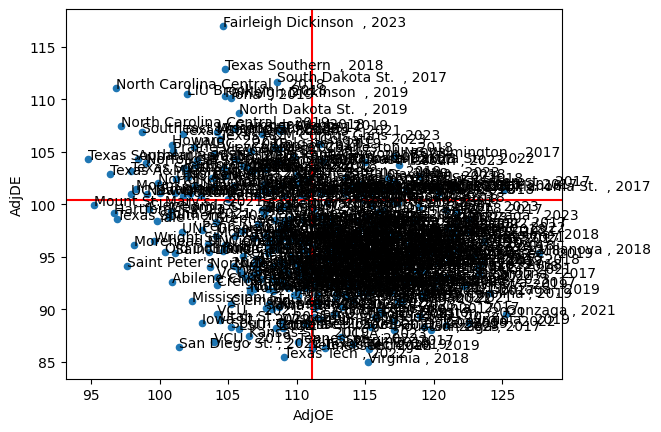

In [201]:
import matplotlib.pyplot as plt
import numpy as np
TournamentTeams = clean_df.dropna(subset=['Tournament Result'])
plt.figure(figsize=(10,8))
ax = TournamentTeams.plot.scatter(x='AdjOE', y = 'AdjDE')
for idx, row in TournamentTeams.iterrows():
    ax.annotate(row['Team'] + ", " + str(row['Year']), (row['AdjOE'],row['AdjDE']))
ax.axvline(np.percentile(TournamentTeams['AdjOE'],50), color='red')
ax.axhline(np.percentile(TournamentTeams['AdjDE'],75), color='red')


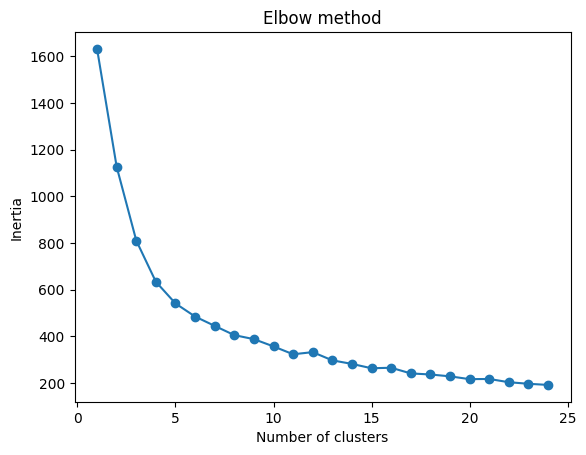

In [212]:
features = TournamentTeams[['AdjOE Rank', 'AdjDE Rank','EFG% Rank', 'EFGD% Rank']]

#Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

import sklearn.cluster
from sklearn.cluster import KMeans

inertias = []

for i in range(1,25):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_features)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,25), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


[[-0.66625745 -0.72249487 -0.7375698  -0.7527796 ]
 [-0.02372545 -0.5835955   1.49144811 -0.07393709]
 [ 0.44488612  1.56502413 -0.68572781  0.65774122]
 [ 1.91267608  0.45590946  0.11433036 -0.14623155]
 [-0.72009639  0.53028194 -0.70960645  1.83195472]
 [ 2.38289142  1.74246063  1.81212894  0.60392389]
 [ 2.07709887 -0.27200919  2.20800143 -0.8103189 ]
 [-0.3918839  -0.32239336  0.07326966  0.23788729]
 [-0.48433328  0.2989009  -0.84998332  0.05803412]
 [ 1.13695448  2.76159714 -0.04075047  2.13626331]
 [-0.04132107 -0.73886699  0.47353523 -0.88631264]]


C:\Users\Manas\AppData\Local\Temp\ipykernel_15228\1641492856.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TournamentTeams['Cluster'] = labels


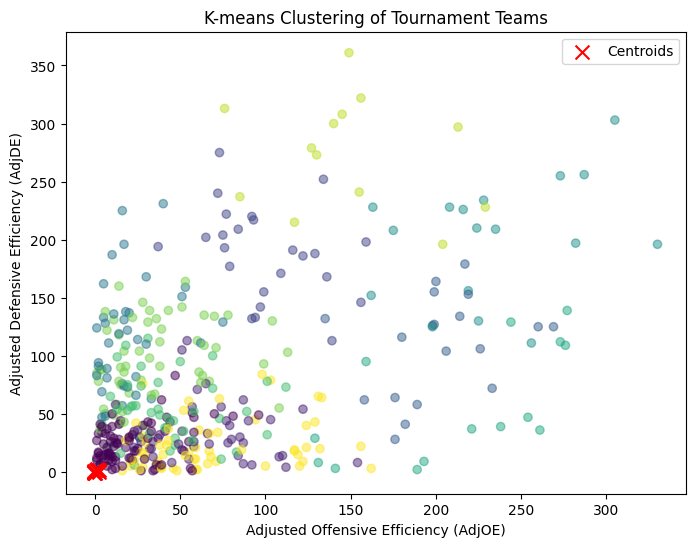

In [213]:
# Define the number of clusters
k = 11  # You can adjust this value as needed

# Initialize the KMeans model
kmeans = KMeans(n_clusters=k)

# Fit the model to the data
kmeans.fit(scaled_features)

# Get the cluster centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print(centroids)

# Add cluster labels to the DataFrame
TournamentTeams['Cluster'] = labels

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(TournamentTeams['AdjOE Rank'], TournamentTeams['AdjDE Rank'], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.xlabel('Adjusted Offensive Efficiency (AdjOE)')
plt.ylabel('Adjusted Defensive Efficiency (AdjDE)')
plt.title('K-means Clustering of Tournament Teams')
plt.legend()
plt.show()

In [214]:
from sklearn.metrics import silhouette_score

# Predict clusters for the data
predicted_labels = kmeans.predict(scaled_features)

# Calculate silhouette score
silhouette = silhouette_score(scaled_features, predicted_labels)

print("Silhouette Score:", silhouette)

Silhouette Score: 0.2798475266680989


In [231]:
clustersummary = TournamentTeams.pivot_table(index = ['Tournament Seed','Cluster'],
                             values = ['Tournament Games Won','is_underperformer', 'AdjOE','AdjDE'],
                             aggfunc = 'mean')
clustersummary.to_excel('pivot_clusters.xlsx')

In [232]:
CYData = clean_df[clean_df['Year'] == 2024].copy()
print(CYData)

       Rk                                         Team  Conf   G   Rec  AdjOE  \
2574    1                       Houston  (H) 10 Kansas   B12  30  27–3  119.5   
2575    2                                       Purdue   B10  30  27–3  126.4   
2576    3               Connecticut  (A) 63 Providence    BE  30  27–3  125.8   
2577    4                          Arizona  (A) 86 USC   P12  30  24–6  122.9   
2578    5                       Auburn  (H) 74 Georgia   SEC  30  23–7  120.2   
...   ...                                          ...   ...  ..   ...    ...   
2944  358                                          VMI    SC  29  1–28   88.1   
2945  359                               St. Francis PA   NEC  28  6–22   93.4   
2946  360                                        IUPUI  Horz  29  3–26   92.6   
2947  361                                   Coppin St.  MEAC  28  2–26   85.0   
2948  362  Mississippi Valley St.  (A) 289 Jackson St.  SWAC  30  1–29   84.9   

      AdjDE  Barthag  EFG% 

In [233]:
CYData['Team'] = CYData['Team'].str.partition('(')[0]

In [235]:
new_features = CYData[['AdjOE Rank', 'AdjDE Rank','EFG% Rank', 'EFGD% Rank']]
scaled_new_features = scaler.fit_transform(new_features)
new_labels = kmeans.predict(scaled_new_features)

CYData['Cluster'] = new_labels

In [237]:
CYData[['Team', 'Rk','AdjOE', 'AdjDE','Cluster']].to_excel('Torvik 11 Clusters.xlsx')